# Mode identifier on theta-space

In [9]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

In [10]:
# Change as necessary
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
n_at = 6
THSPC_DIR = "theta"

In [25]:
th_min, th_max, ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
ntheta = int(ntheta)
KPT = 'K'
print(f"{ntheta} angles from {th_min} to {th_max}")

101 angles from 0.01 to 10.0


In [26]:
# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mags.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
dataset = np.load(path)
phonons = np.load(ppath)
nmodes = dataset.shape[1]
print("Dataset shape:", dataset.shape)
print("Number of modes:", nmodes)
thetas = np.linspace(th_min, th_max, ntheta)

DMs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/dms.npy')
GM_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/GM_set.npy')
k_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/k_set.npy')
bl_M = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/masses.npy')
mesh = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mesh.npy')
print(f"Mesh shape: {mesh.shape}")
print(f"K-point: {KPT}")

Dataset shape: (101, 61, 1521, 3)
Number of modes: 61
Mesh shape: (101, 1521, 2)
K-point: K


In [27]:
# # Identify the LB modes
# LBs = [0]*ntheta
# for i, tnsr in enumerate(phonons):
#     tnsr = np.transpose(tnsr, axes=(1,0,2,3))
#     LB_i = []
#     for j, band in enumerate(tnsr):
#         if np.all(band[0,:,2] > -1e-2) and np.mean(band[0,:,2]) > 1e-4 and np.all(band[1,:,2] < 1e-2):
#             LB_i.append(j)
#     print(f"[{round(thetas[i], 2)}] LB @ {LB_i}")
#     LBs[i] = LB_i

In [28]:
# # Identify the S modes
# for i, tnsr in enumerate(phonons):
#     tnsr = np.transpose(tnsr, axes=(1,0,2,3))
#     Ss = []
#     for j, band in enumerate(tnsr):
#         reverse = np.all(np.abs(band[0] + band[1]) < 1e-2)
#         if reverse and (j not in LBs[i]):
#             Ss.append(j)
#     print(f"[{round(thetas[i], 2)}] S @ {Ss}")

Analyzing theta = 10.0 (idx=100)


<Figure size 432x288 with 0 Axes>

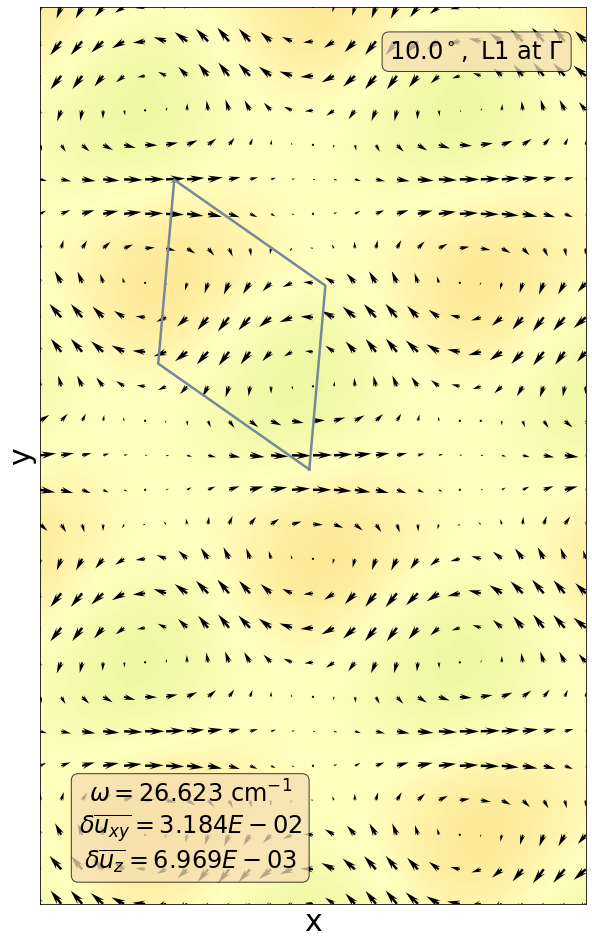

<Figure size 432x288 with 0 Axes>

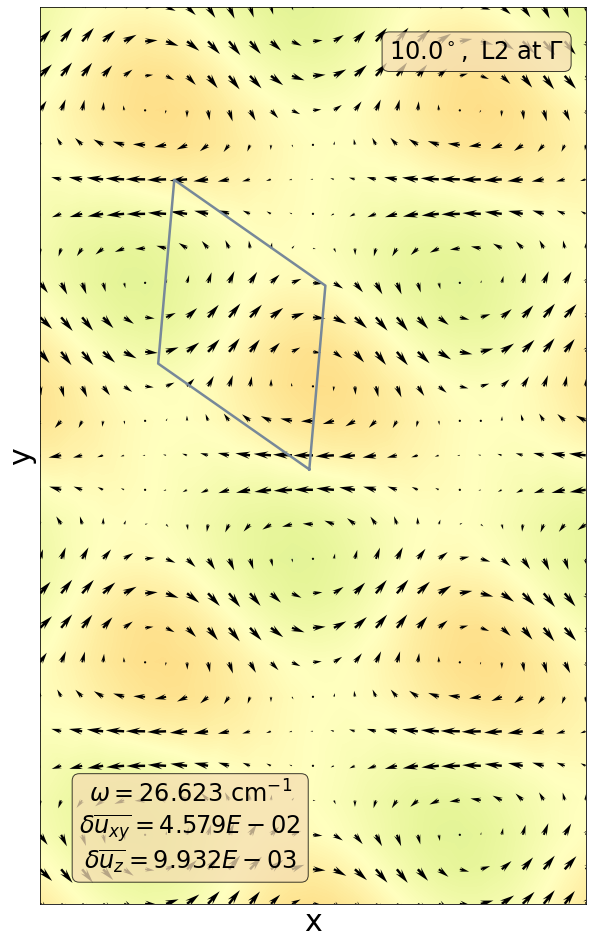

In [29]:
# Visualize the real-space phonons
THETA_IDX = 100
WHICH_MODE = 3
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=3,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=False, outname='MoS2.png')

Analyzing theta = 3.0069999999999997 (idx=30)
3 atoms per layer


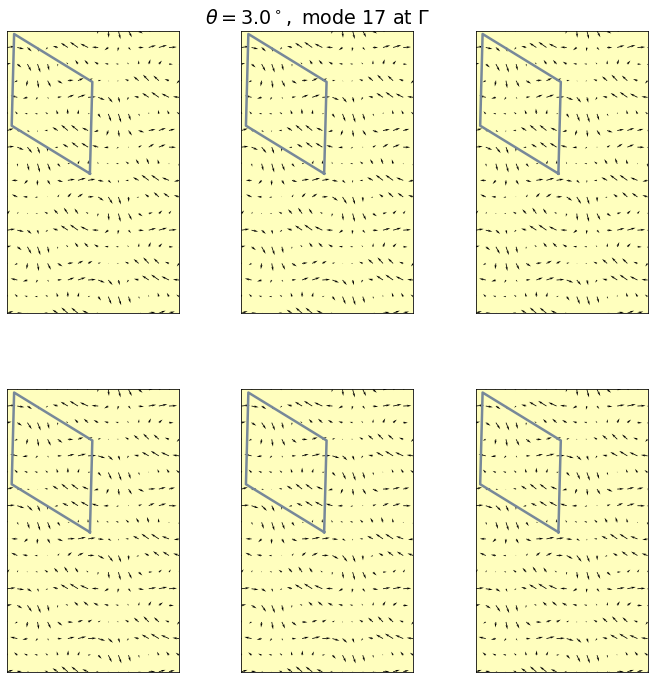

In [16]:
# Visualize the real-space phonons per atom
THETA_IDX = 30
WHICH_MODE = 17
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            outdir=f'{ROOT}/data_mlph/')
ph.plot_a_phonon_per_atom(WHICH_MODE, save=False)